In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#import datasets
train_df = pd.read_csv("node_features_train.csv")
test_df = pd.read_csv("node_features_test.csv")

In [15]:
train_df.groupby("y").mean()

,same_channel,age_diff,same_category,length_diff,views_diff,rate_diff,nb_rate_diff,comments_diff
y,,,,,,,,
0,0.000013,0.028886,0.127489,0.018596,-14.059732,-0.000307,-0.036332,-0.024122
1,0.196092,0.266694,0.621530,11.920625,2962.617657,0.109800,6.300455,4.207372


In [16]:
test_df.groupby("y").mean()

,same_channel,age_diff,same_category,length_diff,views_diff,rate_diff,nb_rate_diff,comments_diff
y,,,,,,,,
0,0.000035,0.054749,0.127435,-12.856303,-146.597472,-0.006010,-0.378100,-0.155144
1,0.196127,0.245299,0.620224,11.219570,2204.554204,0.107236,4.933629,3.300329


In [18]:
y_train = train_df["y"]
x_train = train_df.drop("y", axis=1)
y_test = test_df["y"]
x_test = test_df.drop("y", axis=1)

<AxesSubplot:>

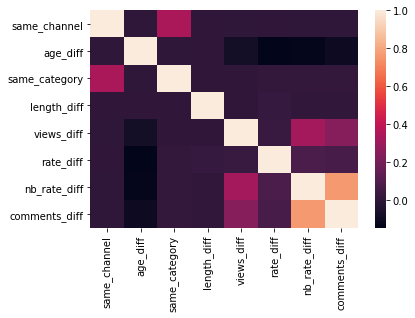

In [19]:
#correlation matrix
sns.heatmap(x_train.corr())

# Logistic Regression

In [24]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression())], 
    verbose = True)

In [25]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.0s


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())],
         verbose=True)

Text(0.5, 0, 'Logistic Regression Coefficients')

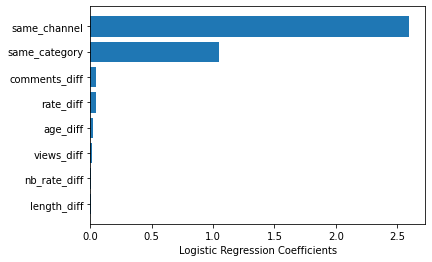

In [29]:
sorted_idx = pipeline["classifier"].coef_.ravel().argsort()
plt.barh(x_train.columns[sorted_idx], pipeline["classifier"].coef_.ravel()[sorted_idx])
plt.xlabel("Logistic Regression Coefficients")

In [30]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.7283476790350175


# Random Forest

In [46]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier())], 
    verbose = True)

In [47]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 2.9min


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())],
         verbose=True)

In [48]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.7471134801908


Text(0.5, 0, 'Random Forest Feature Importance')

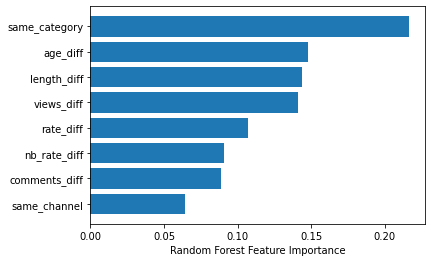

In [49]:
sorted_idx = pipeline["classifier"].feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], pipeline["classifier"].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")